<h1> Judgement Pendency Prediction <h1>


The data used in this file is an abridged version of the dataset [available here](https://www.devdatalab.org/judicial-data) based on the work of [Bhowmik et. al. (2021)](https://dl.acm.org/doi/abs/10.1145/3460112.3471943). The cleaned up and abrdiged dataset with license terms used in this code can be downloaded at https://drive.google.com/file/d/1aQcfZTi2GFdyod8bFYi0VEGqX6mUUhJ4/view?usp=drive_link


## Import of libraries & dataset

### Import Libraries

In [ ]:
!pip install seaborn

In [ ]:
!pip install matplotlib

In [ ]:
!pip install pandas

In [ ]:
! pip install numpy

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from datetime import date


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import log_loss
from sklearn import tree

### Import of Cases 2010

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
20# Download the dataset from the zip file and keep the file case_2010_final.csv it on your google drive.
# You would have to change path below appropriately to load and run the below line of code.
df_cases2010_orig = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/cases_2010_final.csv")
#print all columns
pd.set_option('display.max_columns', None)
df_cases2010_orig.head()

,ddl_case_id,year,state_code,dist_code,court_no,cino,judge_position,female_defendant,female_petitioner,female_adv_def,female_adv_pet,type_name,purpose_name,disp_name,date_of_filing,date_of_decision,date_first_list,date_last_list,date_next_list,act,section,bailable_ipc,number_sections_ipc,criminal,ddl_filing_judge_id,ddl_decision_judge_id,female_judge_filing,start_date_filing,end_date_filing,female_judge_decision,start_date_decision,end_date_decision,judgediff,pendency_decision_filing,pendency_first_filing,pendency_decision_first,pendency_next_last,pendency_decision_last,pendency_decision_next,pendency_decision_filing_categories,filing_judge_tenure,decision_judge_tenure
0,01-01-01-201908000152010,2010,1,1,1,MHNB030003482010,chief judicial magistrate,0,0 male,-9999,0,1429,4946.0,25,2010-04-20 00:00:00+00:00,2011-03-31 00:00:00+00:00,2010-06-23 00:00:00+00:00,2011-02-28 00:00:00+00:00,2011-03-31 00:00:00+00:00,13504.0,1244334.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,2.0,9.0,1.0,1.0,0.0,upto 1 year,NaN,NaN
1,01-01-01-201908000242010,2010,1,1,1,MHNB030001272010,chief judicial magistrate,0,1 female,-9999,-9998,1429,3627.0,22,2010-02-11 00:00:00+00:00,2013-07-01 00:00:00+00:00,2010-03-11 00:00:00+00:00,2013-06-12 00:00:00+00:00,2013-07-01 00:00:00+00:00,4759.0,132871.0,NaN,NaN,1.0,NaN,51.0,NaN,NaN,NaN,0 nonfemale,2013-06-10,2013-09-23,NaN,41,1.0,40.0,1.0,1.0,0.0,3 to 6 years,NaN,3.0
2,01-01-01-201908000702010,2010,1,1,1,MHNB030014152010,chief judicial magistrate,0,0 male,0,1,1429,509.0,25,2010-05-28 00:00:00+00:00,2015-07-27 00:00:00+00:00,2012-12-24 00:00:00+00:00,2015-06-19 00:00:00+00:00,2015-07-27 00:00:00+00:00,9533.0,1166313.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62,31.0,31.0,1.0,1.0,0.0,3 to 6 years,NaN,NaN
3,01-01-01-201908001322010,2010,1,1,1,MHNB030009002010,chief judicial magistrate,-9998,1 female,0,0,1429,2237.0,25,2010-08-31 00:00:00+00:00,2010-09-09 00:00:00+00:00,2010-09-03 00:00:00+00:00,2010-09-06 00:00:00+00:00,2010-09-09 00:00:00+00:00,4759.0,1123673.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1.0,0.0,0.0,0.0,0.0,upto 1 year,NaN,NaN
4,01-01-01-201908001572010,2010,1,1,1,MHNB030010732010,chief judicial magistrate,0,1 female,-9999,0,1429,3280.0,30,2010-11-12 00:00:00+00:00,2013-05-13 00:00:00+00:00,2010-12-13 00:00:00+00:00,2013-03-26 00:00:00+00:00,2013-05-13 00:00:00+00:00,4759.0,132871.0,NaN,NaN,1.0,NaN,92.0,NaN,NaN,NaN,0 nonfemale,2011-06-06,2014-02-21,NaN,30,1.0,29.0,2.0,2.0,0.0,1 to 3 years,NaN,32.0


In [ ]:
df_cases2010_orig.dtypes

ddl_case_id                             object
year                                     int64
state_code                               int64
dist_code                                int64
court_no                                 int64
cino                                    object
judge_position                          object
female_defendant                         int64
female_petitioner                       object
female_adv_def                           int64
female_adv_pet                           int64
type_name                                int64
purpose_name                           float64
disp_name                                int64
date_of_filing                          object
date_of_decision                        object
date_first_list                         object
date_last_list                          object
date_next_list                          object
act                                    float64
section                                float64
bailable_ipc 

## Preprocessing & Feature Engineering

In [ ]:
missing_values = df_cases2010_orig.isna().sum()
total_rows = df_cases2010_orig.shape[0]
# print column names and number of missing values
for col, num_missing in missing_values.items():
    percent_missing = round(num_missing/total_rows*100)
    print(f"Column '{col}' has {num_missing} missing values which is {percent_missing}% of total")

Column 'ddl_case_id' has 0 missing values which is 0% of total
Column 'year' has 0 missing values which is 0% of total
Column 'state_code' has 0 missing values which is 0% of total
Column 'dist_code' has 0 missing values which is 0% of total
Column 'court_no' has 0 missing values which is 0% of total
Column 'cino' has 0 missing values which is 0% of total
Column 'judge_position' has 0 missing values which is 0% of total
Column 'female_defendant' has 0 missing values which is 0% of total
Column 'female_petitioner' has 0 missing values which is 0% of total
Column 'female_adv_def' has 0 missing values which is 0% of total
Column 'female_adv_pet' has 0 missing values which is 0% of total
Column 'type_name' has 0 missing values which is 0% of total
Column 'purpose_name' has 233545 missing values which is 6% of total
Column 'disp_name' has 0 missing values which is 0% of total
Column 'date_of_filing' has 0 missing values which is 0% of total
Column 'date_of_decision' has 570401 missing value

We will drop following features as for year 2010 the majority of data about the filling and decision judges is missing

* ddl_filing_judge_id
* ddl_decision_judge_id
* start_date_filing
* end_date_filing
* start_date_decision
* end_date_decision
* judgediff
* filing_judge_tenure             
* decision_judge_tenure    
* purpose_name


The following are dropped as these dates are converted into categorical variables as periods

* date_of_filing                       
* date_of_decision                    
* date_first_list                    
* date_last_list                        
* date_next_list

The following are dropped as they are just identifiers

* ddl_case_id                            
* year
* cino

These variables are not included as features for our modelling as they will not be available when the model will be used for prediction or deemed not important*

* disp_name
* pendency_first_filing
* pendency_decision_first
* pendency_decision_last
* pendency_decision_filing
* pendency_decision_next
* pendency_next_last

In [ ]:
df_cases2010_orig["court_details"] = df_cases2010_orig["state_code"].astype(str) + "_" + df_cases2010_orig["dist_code"].astype(str) + "_" + df_cases2010_orig["court_no"].astype(str)

df_cases2010_orig["state_district"] = df_cases2010_orig["state_code"].astype(str) + "_" + df_cases2010_orig["dist_code"].astype(str)

In [ ]:
columns_to_drop = ['ddl_filing_judge_id','ddl_decision_judge_id','start_date_filing','end_date_filing','start_date_decision','end_date_decision',\
                   'judgediff','filing_judge_tenure','decision_judge_tenure','date_first_list','date_last_list','date_next_list','disp_name',\
                   'pendency_decision_first','pendency_decision_first','pendency_decision_last', 'pendency_decision_next','pendency_first_filing', \
                   'pendency_next_last','ddl_case_id','year','cino','court_no','dist_code','purpose_name']


# Create a copy of the dataframe and start preparing the same for prediction modelling
df_cases2010 = df_cases2010_orig.drop(columns=columns_to_drop, axis=1)


In [ ]:
df_cases2010.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4190783 entries, 0 to 4190782
Data columns (total 20 columns):
 #   Column                               Dtype  
---  ------                               -----  
 0   state_code                           int64  
 1   judge_position                       object 
 2   female_defendant                     int64  
 3   female_petitioner                    object 
 4   female_adv_def                       int64  
 5   female_adv_pet                       int64  
 6   type_name                            int64  
 7   date_of_filing                       object 
 8   date_of_decision                     object 
 9   act                                  float64
 10  section                              float64
 11  bailable_ipc                         object 
 12  number_sections_ipc                  float64
 13  criminal                             float64
 14  female_judge_filing                  object 
 15  female_judge_decision           

In [ ]:
df_cases2010 = df_cases2010.fillna("NA")

In [ ]:
# Convert all other features to categorical except pendency_first_filing which is numerical
# number_sections_ipc is treated as categorical as it has lots of missing values which is better handled as categorical data
df_cases2010['state_code'] = df_cases2010['state_code'].astype(str).astype('category')
df_cases2010['judge_position'] = df_cases2010['judge_position'].astype(str).astype('category')
df_cases2010['female_defendant'] = df_cases2010['female_defendant'].astype(str).astype('category')
df_cases2010['female_petitioner'] = df_cases2010['female_petitioner'].astype(str).astype('category')
df_cases2010['female_adv_def'] = df_cases2010['female_adv_def'].astype(str).astype('category')
df_cases2010['female_adv_pet'] = df_cases2010['female_adv_pet'].astype(str).astype('category')
df_cases2010['type_name'] = df_cases2010['type_name'].astype(str).astype('category')
df_cases2010['act'] = df_cases2010['act'].astype(str).astype('category')
df_cases2010['section'] = df_cases2010['section'].astype(str).astype('category')
df_cases2010['bailable_ipc'] = df_cases2010['bailable_ipc'].astype(str).astype('category')
df_cases2010['number_sections_ipc'] = df_cases2010['number_sections_ipc'].astype(str).astype('category')
df_cases2010['criminal'] = df_cases2010['criminal'].astype(str).astype('category')
df_cases2010['female_judge_filing'] = df_cases2010['female_judge_filing'].astype(str).astype('category')
df_cases2010['female_judge_decision'] = df_cases2010['female_judge_decision'].astype(str).astype('category')
df_cases2010['pendency_decision_filing_categories'] = df_cases2010['pendency_decision_filing_categories'].astype(str).astype('category')

In [ ]:
mean_vals = df_cases2010['pendency_decision_filing'].mean()
median_vals = df_cases2010['pendency_decision_filing'].median()
percentile_75th = np.percentile(df_cases2010['pendency_decision_filing'], 75)

print("Mean values:\n", mean_vals)
print("\nMedian values:\n", median_vals)
print("\n75th Percentile:\n", percentile_75th)

Mean values:
 1.255378919212472e+18

Median values:
 38.0

75th Percentile:
 74.0


In [ ]:
print(df_cases2010['pendency_decision_filing_categories'].unique().tolist)

<bound method ExtensionArray.tolist of ['upto 1 year', '3 to 6 years', '1 to 3 years', '>10 years', '6 to 10 years']
Categories (5, object): ['1 to 3 years', '3 to 6 years', '6 to 10 years', '>10 years', 'upto 1 year']>


In [ ]:
# create columns for binary classification problem
mapping_three = {'upto 1 year': 'less_three' ,'1 to 2 years': 'less_three', '2 to 3 years': 'less_three','3 to 4 years': 'three_plus','4 to 5 years': 'three_plus', '5 to 6 years': 'three_plus','6 to 7 years': 'three_plus', '7 to 8 years': 'three_plus','8 to 9 years': 'three_plus', '9 to 10 years': 'three_plus',  '10 to 11 years': 'three_plus','upto 1 year': 'less_three' }
df_cases2010['pendency_model_threeyear'] =df_cases2010['pendency_decision_filing_categories'].replace(mapping_three)
df_cases2010['pendency_model_threeyear'] = df_cases2010['pendency_model_threeyear'].astype(str).astype('category')


In [ ]:
df_cases2010.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4190783 entries, 0 to 4190782
Data columns (total 21 columns):
 #   Column                               Dtype   
---  ------                               -----   
 0   state_code                           category
 1   judge_position                       category
 2   female_defendant                     category
 3   female_petitioner                    category
 4   female_adv_def                       category
 5   female_adv_pet                       category
 6   type_name                            category
 7   date_of_filing                       object  
 8   date_of_decision                     object  
 9   act                                  category
 10  section                              category
 11  bailable_ipc                         category
 12  number_sections_ipc                  category
 13  criminal                             category
 14  female_judge_filing                  category
 15  female_judge_de

In [ ]:
y = df_cases2010["pendency_model_threeyear"]

In [ ]:
col = pd.Categorical(y)
y = pd.Series(col.codes)
y_class = col.categories.tolist()

In [ ]:
#We next drop the target variables from the feature matrix
df_cases2010.drop(columns='pendency_decision_filing', axis=1, inplace=True)
df_cases2010.drop(columns='pendency_decision_filing_categories', axis=1, inplace=True)
df_cases2010.drop(columns='pendency_model_threeyear', axis=1, inplace=True)

In [ ]:
# Lable Encode all Categorical Features
le = LabelEncoder()
cat_cols = df_cases2010.select_dtypes(include=['category']).columns
df_cases2010[cat_cols] = df_cases2010[cat_cols].apply(lambda col: le.fit_transform(col))

In [ ]:
# Assuming you have a DataFrame named 'df_cases2010',
# create a copy for calculating pendency
df_with_dates = df_cases2010.copy()

# Check if 'date_of_filing' and 'date_of_decision' are in the DataFrame
if 'date_of_filing' in df_with_dates.columns and 'date_of_decision' in df_with_dates.columns:
    # Calculate pendency as the difference between date_of_decision and date_of_filing
    df_with_dates['date_of_filing'] = pd.to_datetime(df_with_dates['date_of_filing'])
    df_with_dates['date_of_decision'] = pd.to_datetime(df_with_dates['date_of_decision'])
    df_with_dates['pendency_days'] = (df_with_dates['date_of_decision'] - df_with_dates['date_of_filing']).dt.days

    # Group by state and calculate the mean pendency
    state_pendency = df_with_dates.groupby('state_code')['pendency_days'].mean().sort_values()

    # Display states with the least pendency
    print("States with the least pendency:")
    print(state_pendency.head(10))

    # Display states with the most pendency
    print("States with the most pendency:")
    print(state_pendency.tail(10))
else:
    print("Error: 'date_of_filing' or 'date_of_decision' not found in the DataFrame.")

ValueError: time data "NA" doesn't match format "%Y-%m-%d %H:%M:%S%z", at position 39. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

States with the least pendency:
state_code
30     474.437977
3      709.704270
26     748.865451
1      845.259333
4      849.867932
23     866.276134
31     928.602510
24     933.279070
19     950.193662
20    1010.273604
Name: pendency_days, dtype: float64
States with the most pendency:
state_code
5     1418.281614
12    1465.930175
25    1572.080128
13    1654.943751
16    1695.721503
9     1715.877863
7     1833.538287
11    1906.881953
18    2078.473695
8     2097.556645
Name: pendency_days, dtype: float64


<ipython-input-34-a19c6326a3cf>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_pendency.head(10).index, y=state_pendency.head(10).values, palette='viridis')


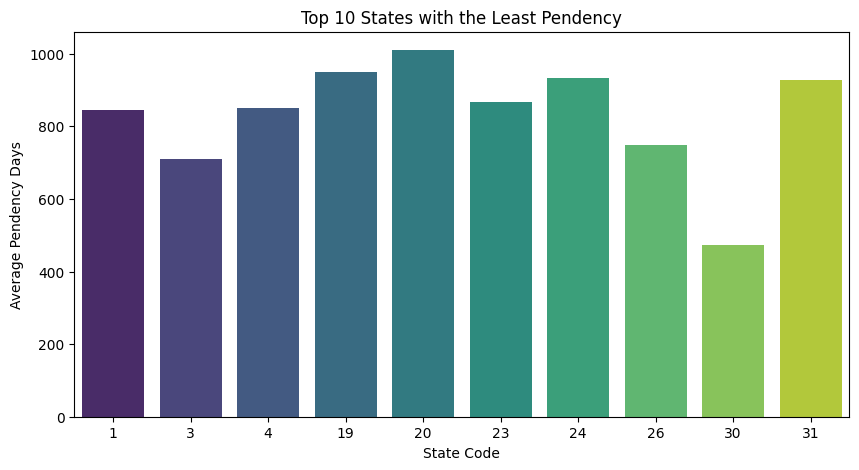

<ipython-input-34-a19c6326a3cf>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_pendency.tail(10).index, y=state_pendency.tail(10).values, palette='viridis')


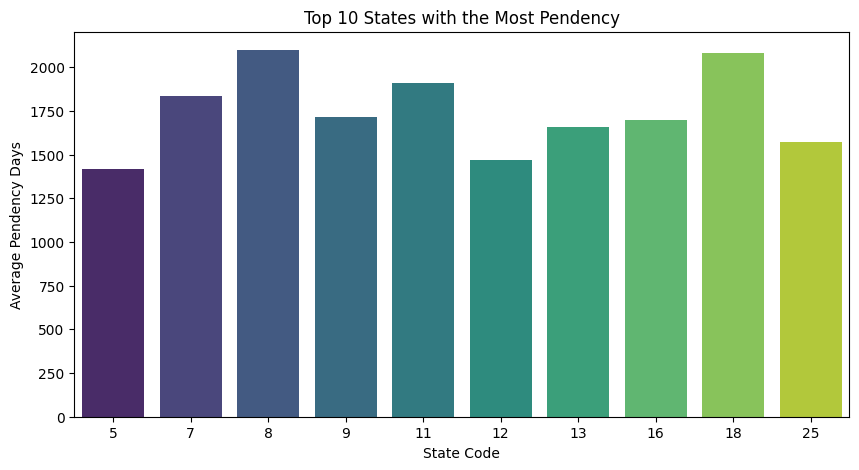

In [ ]:
# Assuming you have a DataFrame named 'df_cases2010',
# create a copy for calculating pendency
df_with_dates = df_cases2010.copy()

# Check if 'date_of_filing' and 'date_of_decision' are in the DataFrame
if 'date_of_filing' in df_with_dates.columns and 'date_of_decision' in df_with_dates.columns:
    # Calculate pendency as the difference between date_of_decision and date_of_filing
    df_with_dates['date_of_filing'] = pd.to_datetime(df_with_dates['date_of_filing'])
    df_with_dates['date_of_decision'] = pd.to_datetime(df_with_dates['date_of_decision'])
    df_with_dates['pendency_days'] = (df_with_dates['date_of_decision'] - df_with_dates['date_of_filing']).dt.days

    # Group by state and calculate the mean pendency
    state_pendency = df_with_dates.groupby('state_code')['pendency_days'].mean().sort_values()

    # Display states with the least pendency
    print("States with the least pendency:")
    print(state_pendency.head(10))

    # Display states with the most pendency
    print("States with the most pendency:")
    print(state_pendency.tail(10))

    # Bar plot for states with the least pendency
    plt.figure(figsize=(10, 5))
    sns.barplot(x=state_pendency.head(10).index, y=state_pendency.head(10).values, palette='viridis')
    plt.title('Top 10 States with the Least Pendency')
    plt.xlabel('State Code')
    plt.ylabel('Average Pendency Days')
    plt.show()

    # Bar plot for states with the most pendency
    plt.figure(figsize=(10, 5))
    sns.barplot(x=state_pendency.tail(10).index, y=state_pendency.tail(10).values, palette='viridis')
    plt.title('Top 10 States with the Most Pendency')
    plt.xlabel('State Code')
    plt.ylabel('Average Pendency Days')
    plt.show()

Defendant counts:
female_defendant
 0       2857143
-9998     776083
 1        518260
-9999      39297
Name: count, dtype: int64

Petitioner counts:
female_petitioner
-9998 unclear         1916729
0 male                1607385
1 female               645025
-9999 missing name      21644
Name: count, dtype: int64


<ipython-input-35-42776d850cf9>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cases2010, x='defendant_gender', palette='viridis')
<ipython-input-35-42776d850cf9>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cases2010, x='petitioner_gender', palette='viridis')
<ipython-input-35-42776d850cf9>:29: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.countplot(data=df_cases2010, x='petitioner_gender', palette='viridis')


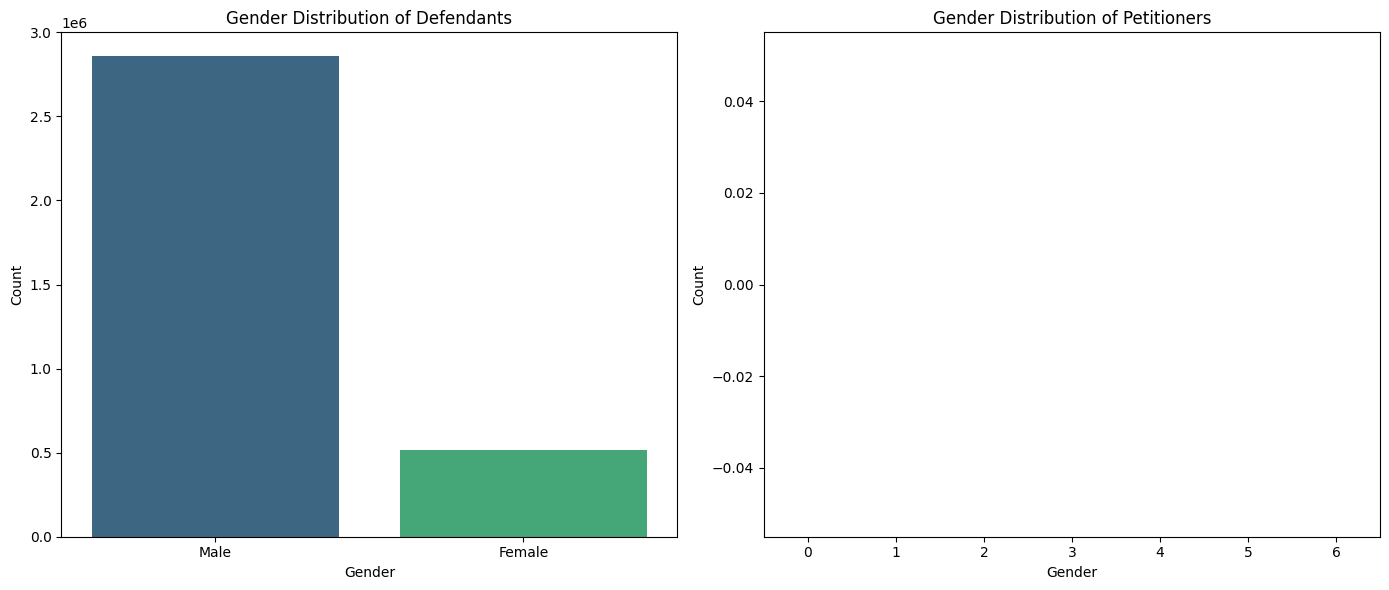

In [ ]:
# Assuming df_cases2010 is your DataFrame

# Numerical representation of the data
defendant_counts = df_cases2010['female_defendant'].value_counts()
petitioner_counts = df_cases2010['female_petitioner'].value_counts()

# Display numerical data
print("Defendant counts:")
print(defendant_counts)
print("\nPetitioner counts:")
print(petitioner_counts)

# Convert numerical values to categorical labels
df_cases2010['defendant_gender'] = df_cases2010['female_defendant'].map({0: 'Male', 1: 'Female'})
df_cases2010['petitioner_gender'] = df_cases2010['female_petitioner'].map({0: 'Male', 1: 'Female'})

# Plotting the data
plt.figure(figsize=(14, 6))

# Plot for defendants
plt.subplot(1, 2, 1)
sns.countplot(data=df_cases2010, x='defendant_gender', palette='viridis')
plt.title('Gender Distribution of Defendants')
plt.xlabel('Gender')
plt.ylabel('Count')

# Plot for petitioners
plt.subplot(1, 2, 2)
sns.countplot(data=df_cases2010, x='petitioner_gender', palette='viridis')
plt.title('Gender Distribution of Petitioners')
plt.xlabel('Gender')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

State-wise mean pendency days:
state_code
30     474.437977
3      709.704270
26     748.865451
1      845.259333
4      849.867932
23     866.276134
31     928.602510
24     933.279070
19     950.193662
20    1010.273604
2     1011.860829
21    1018.754750
15    1038.919248
29    1099.885844
14    1147.797124
17    1148.973458
27    1164.383868
22    1260.714454
6     1277.069936
32    1280.523577
10    1379.469705
5     1418.281614
12    1465.930175
25    1572.080128
13    1654.943751
16    1695.721503
9     1715.877863
7     1833.538287
11    1906.881953
18    2078.473695
8     2097.556645
Name: pendency_days, dtype: float64


<ipython-input-37-2d7f93f7252b>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_pendency_mean.index, y=state_pendency_mean.values, palette='viridis')


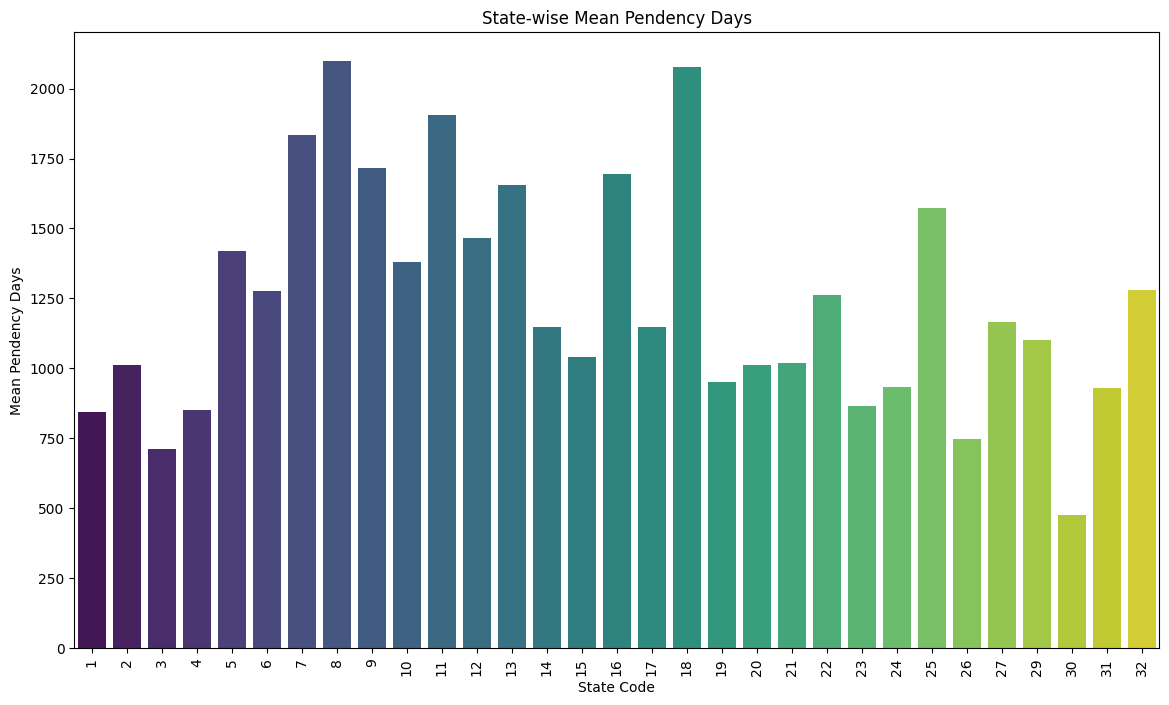

In [ ]:


# Assuming you have a DataFrame named 'df_cases2010',
# create a copy for calculating pendency
df_with_dates = df_cases2010.copy()

# Check if 'date_of_filing' and 'date_of_decision' are in the DataFrame
if 'date_of_filing' in df_with_dates.columns and 'date_of_decision' in df_with_dates.columns:
    # Calculate pendency as the difference between date_of_decision and date_of_filing
    df_with_dates['date_of_filing'] = pd.to_datetime(df_with_dates['date_of_filing'])
    df_with_dates['date_of_decision'] = pd.to_datetime(df_with_dates['date_of_decision'])
    df_with_dates['pendency_days'] = (df_with_dates['date_of_decision'] - df_with_dates['date_of_filing']).dt.days

    # Group by state and calculate the mean pendency
    state_pendency_mean = df_with_dates.groupby('state_code')['pendency_days'].mean().sort_values()

    # Display the mean pendency days state-wise
    print("State-wise mean pendency days:")
    print(state_pendency_mean)

    # Plotting the data
    plt.figure(figsize=(14, 8))
    sns.barplot(x=state_pendency_mean.index, y=state_pendency_mean.values, palette='viridis')
    plt.title('State-wise Mean Pendency Days')
    plt.xlabel('State Code')
    plt.ylabel('Mean Pendency Days')
    plt.xticks(rotation=90)
    plt.show()

## Model Building

### Train Test Split

In [ ]:
# Random seed
seed =100
# split-out train/validation and test dataset
X_train, X_test, y_train, y_test = train_test_split(df_cases2010,  y, test_size=0.20, random_state=seed, shuffle=True, stratify=y)


In [ ]:
# Training and Test Data Size
print(df_cases2010_orig.shape[0])
print(X_train.shape[0])
print(X_test.shape[0])
print(X_test.shape[0]+X_train.shape[0])
print((X_test.shape[0]+X_train.shape[0])/df_cases2010_orig.shape[0]*100)

4190783
3352626
838157
4190783
100.0


### Bagging Tree Classifiers